### Cargamos el embedding

In [1]:
#Asegurar que el código sea reproducible
import random
import numpy as np
import torch

SEED = 3633

#Semilla para Python
random.seed(SEED)

#Semilla para NumPy
np.random.seed(SEED)

# Semilla para PyTorch
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATA_PATH = "csvs/embeddings_gnn.csv" 

data = pd.read_csv(DATA_PATH)
print(f"Shape original: {data.shape}")

data = data.dropna()
print(f"Shape después de dropna: {data.shape}")

data.head()

Shape original: (99818, 131)
Shape después de dropna: (99818, 131)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_121,dim_122,dim_123,dim_124,dim_125,dim_126,dim_127,player,game_id,color
0,0.186119,0.224894,0.144705,-0.175782,0.095944,0.030560,0.151180,0.337592,-0.090849,-0.153542,...,-0.130952,0.114924,-0.046799,0.103017,0.171092,-0.003021,-0.125612,Alekhine,0,black
1,0.315813,0.277531,0.013814,0.044793,0.051820,0.215278,0.178388,0.506271,-0.308271,-0.155647,...,-0.350548,0.174448,-0.249423,0.019336,0.129544,0.313523,0.061583,Alekhine,1,black
2,0.208794,0.196072,0.024174,-0.053569,0.039854,0.341885,0.033939,0.310090,-0.162769,-0.138082,...,-0.204563,0.083665,-0.118874,0.021532,0.126749,0.176464,-0.055112,Alekhine,2,white
3,0.238679,0.223980,0.012921,-0.091717,-0.013169,0.264325,0.075385,0.463902,-0.412598,-0.262492,...,-0.193142,0.042185,-0.243187,0.095005,0.163843,0.211810,-0.032563,Alekhine,3,white
4,0.254185,0.170033,0.070007,-0.025069,0.056162,0.023767,0.215903,0.461962,-0.098904,-0.190934,...,-0.235553,0.205192,-0.154784,0.162187,0.235318,0.193537,-0.035006,Alekhine,4,black


### Armar vector de embedding

In [3]:
embedding_columns = [f"dim_{i}" for i in range(128)]
data['embedding'] = data[embedding_columns].values.tolist()
X = np.stack(data['embedding'].values)

print("Matriz de embeddings:", X.shape)

Matriz de embeddings: (99818, 128)


### Visualización con UMAP

c:\Users\B\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


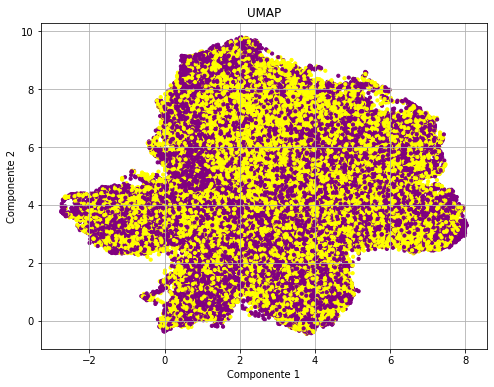

In [4]:
import matplotlib.pyplot as plt
import umap


umap_model = umap.UMAP(n_components=2, random_state=3633)
X_2d = umap_model.fit_transform(X)


color_map = {
    'white': 'yellow',
    'black': 'purple'
}


colors = data['color'].map(color_map)


plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, s=10)
plt.title("UMAP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()



### Método del codo para elegir `k` en K‑Means

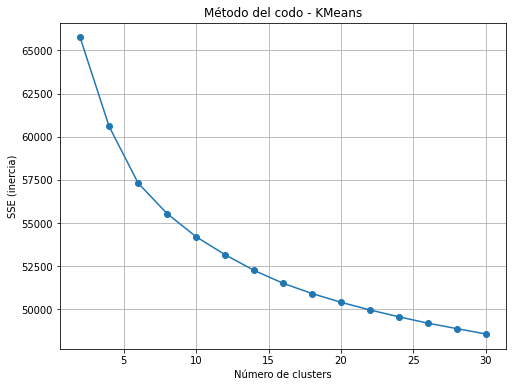

In [5]:
sse = []
K_RANGE = range(2, 31, 2)
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=3633)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(list(K_RANGE), sse, marker='o')
plt.title("Método del codo - KMeans")
plt.xlabel("Número de clusters")
plt.ylabel("SSE (inercia)")
plt.grid(True)
plt.show()

### Entrenar K‑Means con `k` óptimo y asignar clusters

In [6]:
OPTIMAL_K = 8
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=3633)
data['cluster'] = kmeans.fit_predict(X)
data[['player', 'cluster', "game_id"]]

,player,cluster,game_id
0,Alekhine,6,0
1,Alekhine,7,1
2,Alekhine,2,2
3,Alekhine,7,3
4,Alekhine,2,4
...,...,...,...
99813,Zukertort,7,99813
99814,Zukertort,0,99814
99815,Zukertort,6,99815
99816,Zukertort,6,99816


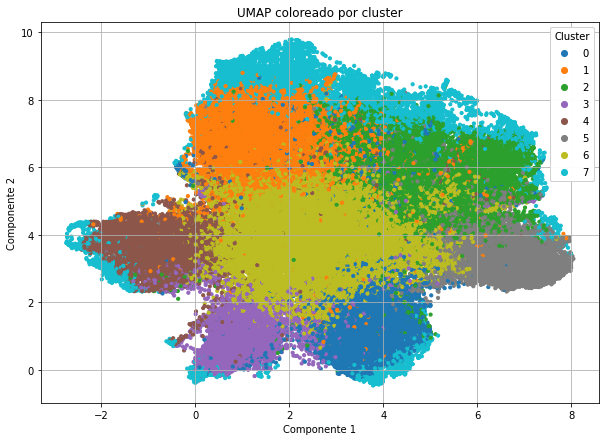

In [7]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data["cluster"], cmap="tab10", s=10)
plt.title("UMAP coloreado por cluster")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster", loc="best")
plt.gca().add_artist(legend1)
plt.show()

### Evaluación


Evaluando K = 2...
Accuracy para K=2: 6.12%

Evaluando K = 4...
Accuracy para K=4: 55.10%

Evaluando K = 6...
Accuracy para K=6: 73.47%

Evaluando K = 8...
Accuracy para K=8: 69.39%

Evaluando K = 10...
Accuracy para K=10: 73.47%

Evaluando K = 12...
Accuracy para K=12: 77.55%

Evaluando K = 14...
Accuracy para K=14: 75.51%

Evaluando K = 16...
Accuracy para K=16: 73.47%

Evaluando K = 18...
Accuracy para K=18: 73.47%

Evaluando K = 20...
Accuracy para K=20: 81.63%

Evaluando K = 22...
Accuracy para K=22: 73.47%

Evaluando K = 24...
Accuracy para K=24: 81.63%

Evaluando K = 26...
Accuracy para K=26: 77.55%

Evaluando K = 28...
Accuracy para K=28: 85.71%

Evaluando K = 30...
Accuracy para K=30: 89.80%

Evaluando K = 32...
Accuracy para K=32: 87.76%

Evaluando K = 34...
Accuracy para K=34: 87.76%

Evaluando K = 36...
Accuracy para K=36: 87.76%

Evaluando K = 38...
Accuracy para K=38: 89.80%

Evaluando K = 40...
Accuracy para K=40: 93.88%

Evaluando K = 42...
Accuracy para K=42: 91.84%



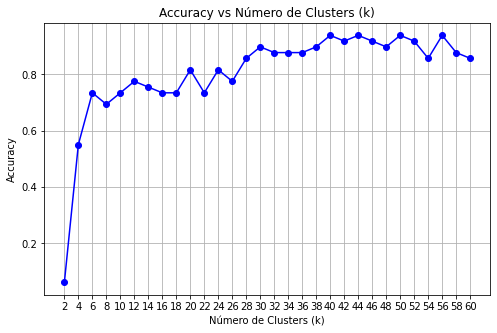

player
Caruana        22
Staunton       22
Fine           20
Tarrasch       17
Bogoljubow     16
Nimzowitsch    15
Lasker         12
Spassky        12
Zukertort      12
Steinitz       10
Schlechter     10
Philidor       10
Winawer         9
Korchnoi        9
Morphy          8
Botvinnik       7
Chigorin        7
Topalov         7
Pillsbury       6
Rubinstein      6
Maroczy         6
Reshevsky       5
Kasparov        4
Leko            3
Tal             2
Bronstein       2
Timman          2
Capablanca      2
Polugaevsky     2
Carlsen         1
Portisch        1
Aronian         1
Anderssen       1
Smyslov         1
Najdorf         1
Petrosian       1
Anand           1
Kramnik         1
Keres           1
Karpov          1
Karjakin        1
Kamsky          1
Ivanchuk        1
Geller          1
Gelfand         1
Fischer         1
Euwe            1
Alekhine        1
Name: correct, dtype: int64

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values):
    results = []
    all_errors = []
    accuracies = []

    for k in k_values:
        print(f"\nEvaluando K = {k}...")

        kmeans = KMeans(n_clusters=k, random_state=3633)
        kmeans.fit(X_train)

        # Asignar clusters
        train_df = train_df.copy()
        train_df["cluster"] = kmeans.labels_
        test_labels = kmeans.predict(X_test)
        test_df = test_df.copy()
        test_df["cluster"] = test_labels

        # Distribución de clusters por jugador
        cluster_dist_train = pd.crosstab(train_df["player"], train_df["cluster"], normalize="index")
        cluster_dist_test = pd.crosstab(test_df["player"], test_df["cluster"], normalize="index")

        # Asegurar misma estructura
        cluster_dist_test = cluster_dist_test.reindex(columns=cluster_dist_train.columns, fill_value=0)

        players_train = cluster_dist_train.index.tolist()
        players_test = cluster_dist_test.index.tolist()

        train_vectors = cluster_dist_train.values
        test_vectors = cluster_dist_test.values

        # Comparar vectores
        sim_matrix = cosine_similarity(test_vectors, train_vectors)
        pred_indices = sim_matrix.argmax(axis=1)
        pred_players = [players_train[idx] for idx in pred_indices]

        # Evaluar
        df_compare = pd.DataFrame({
            "player": players_test,
            "pred_player": pred_players
        })
        df_compare["correct"] = df_compare["player"] == df_compare["pred_player"]
        accuracy_global = df_compare["correct"].mean()*100
        accuracies.append(df_compare["correct"].mean())

        print(f"Accuracy para K={k}: {accuracy_global:.2f}%")

        # Mostrar errores
        errors = df_compare[df_compare["correct"] == False].copy()

        # Guardar resultados
        for player, group in df_compare.groupby("player"):
            acc = group["correct"].mean() * 100
            results.append({"k": k, "player": player, "accuracy_%": acc})

        errors["k"] = k
        all_errors.append(errors)

    results_df = pd.DataFrame(results)
    errors_df = pd.concat(all_errors, ignore_index=True)

    return accuracies, results_df, errors_df


y = data["player"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3633, stratify=y)

train_df = pd.DataFrame({"player": y_train})
test_df = pd.DataFrame({"player": y_test})

k_values = list(range(2, 62, 2))
accuracies, df_results, df_errors = kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs Número de Clusters (k)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Errores por jugador
error_counts = df_errors.groupby("player")["correct"].apply(lambda x: (~x).sum()).sort_values(ascending=False)
error_counts


In [9]:
y = data["player"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3633, stratify=y)

train_df = pd.DataFrame({"player": y_train})
test_df = pd.DataFrame({"player": y_test})

In [10]:
#Mejor Modelo
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=56, random_state=3633)
kmeans.fit(X_train)

train_df = train_df.copy()
train_df["cluster"] = kmeans.labels_


cluster_dist_train = pd.crosstab(train_df["player"], train_df["cluster"], normalize="index")
cluster_dist_test = pd.crosstab(test_df["player"], kmeans.predict(X_test), normalize="index")
cluster_dist_train

cluster,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
player,,,,,,,,,,,,,,,,,,,,,
Alekhine,0.010542,0.016566,0.033133,0.015060,0.027861,0.036898,0.028614,0.008283,0.030120,0.012801,...,0.021084,0.000753,0.022590,0.027861,0.020331,0.033886,0.057982,0.003765,0.005271,0.002259
Anand,0.027075,0.014877,0.025885,0.024993,0.021720,0.010711,0.016067,0.005951,0.019042,0.014281,...,0.011306,0.012496,0.013686,0.036894,0.021720,0.006546,0.021422,0.007736,0.010116,0.031241
Anderssen,0.000000,0.011029,0.014706,0.001838,0.077206,0.003676,0.009191,0.000000,0.191176,0.000000,...,0.003676,0.000000,0.000000,0.018382,0.012868,0.000000,0.009191,0.001838,0.001838,0.001838
Aronian,0.017870,0.032803,0.050673,0.027173,0.019829,0.016157,0.026438,0.007344,0.011995,0.014443,...,0.018115,0.013219,0.007834,0.026683,0.015422,0.015177,0.031334,0.005386,0.014933,0.007589
Bogoljubow,0.011568,0.017995,0.038560,0.011568,0.017995,0.012853,0.024422,0.002571,0.015424,0.019280,...,0.007712,0.011568,0.010283,0.039846,0.015424,0.041131,0.052699,0.005141,0.007712,0.006427
Botvinnik,0.007013,0.014025,0.036466,0.008415,0.001403,0.043478,0.023843,0.011220,0.002805,0.022440,...,0.033661,0.015428,0.014025,0.026648,0.016830,0.035063,0.030856,0.026648,0.014025,0.005610
Bronstein,0.013619,0.036316,0.012970,0.026589,0.011025,0.023995,0.019455,0.016213,0.020752,0.025292,...,0.018158,0.028534,0.019455,0.015564,0.015564,0.018158,0.021401,0.020104,0.023346,0.016213
Capablanca,0.012552,0.012552,0.029289,0.006276,0.031381,0.033473,0.029289,0.010460,0.023013,0.010460,...,0.018828,0.004184,0.048117,0.050209,0.004184,0.060669,0.023013,0.008368,0.004184,0.002092
Carlsen,0.015879,0.028922,0.053308,0.028544,0.015312,0.017958,0.023251,0.003592,0.011153,0.013611,...,0.013422,0.010964,0.005671,0.034783,0.015879,0.015123,0.035917,0.012098,0.012476,0.006616


In [11]:
import pickle
# Guardar el modelo KMeans
with open("kmeans_games.pkl", "wb") as f:
    pickle.dump(kmeans, f)

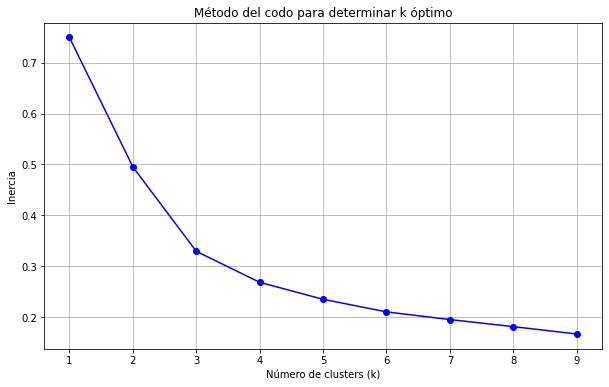

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usamos los vectores de distribución de clusters por jugador
X = cluster_dist_train.values

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [13]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=10, random_state=3633)
cluster_labels = kmeans_final.fit_predict(cluster_dist_train)

# Añadir los resultados al DataFrame
clustered_players = cluster_dist_train.copy()
clustered_players["cluster"] = cluster_labels

for cluster_id in sorted(clustered_players["cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    print(clustered_players[clustered_players["cluster"] == cluster_id].index.tolist())


Cluster 0:
['Winawer']

Cluster 1:
['Bronstein', 'Geller', 'Keres', 'Spassky', 'Tal']

Cluster 2:
['Philidor']

Cluster 3:
['Anderssen', 'Chigorin', 'Lasker', 'Staunton', 'Steinitz', 'Zukertort']

Cluster 4:
['Botvinnik', 'Euwe', 'Fine', 'Gelfand', 'Karpov', 'Korchnoi', 'Kramnik', 'Larsen']

Cluster 5:
['Morphy']

Cluster 6:
['Alekhine', 'Bogoljubow', 'Capablanca', 'Nimzowitsch', 'Pillsbury', 'Rubinstein']

Cluster 7:
['Maroczy', 'Schlechter', 'Tarrasch']

Cluster 8:
['Anand', 'Aronian', 'Carlsen', 'Caruana', 'Fischer', 'Ivanchuk', 'Kamsky', 'Karjakin', 'Kasparov', 'Leko', 'Timman', 'Topalov']

Cluster 9:
['Najdorf', 'Petrosian', 'Polugaevsky', 'Portisch', 'Reshevsky', 'Smyslov']


In [14]:
cluster_dist_train_clean = cluster_dist_train.drop(["Philidor", "Morphy", "Winawer", "Anderssen"], errors="ignore") #quitamos outliers (pocas partidas)


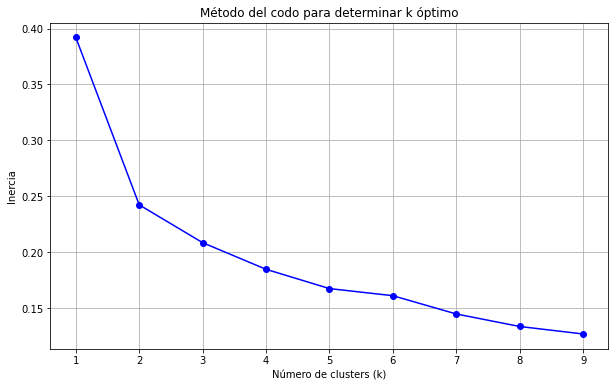

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usamos los vectores de distribución de clusters por jugador
X = cluster_dist_train_clean.values

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.xticks(k_values)
plt.grid(True)
plt.show()

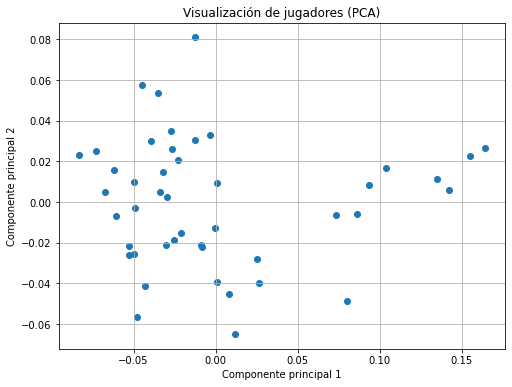

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
X_players_2d = pca.fit_transform(cluster_dist_train_clean.values)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_players_2d[:, 0], X_players_2d[:, 1])
plt.title("Visualización de jugadores (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

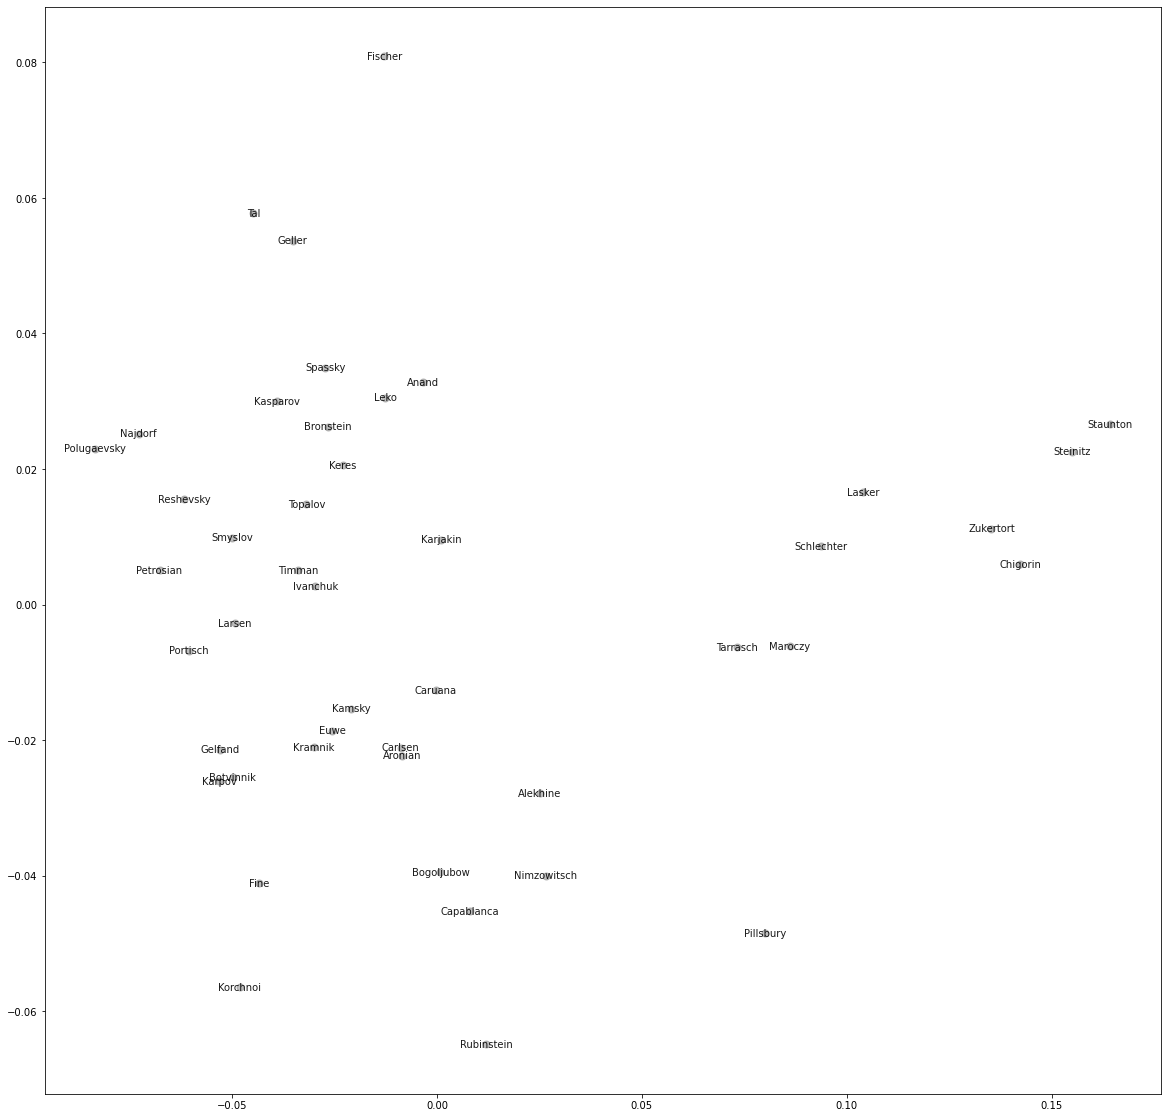

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir a 2D con PCA
pca = PCA(n_components=2)
X_players_2d = pca.fit_transform(cluster_dist_train_clean.values)

# Supón que es un jugador específico (ej. 'OutlierPlayer')
mask = cluster_dist_train_clean.index != "Philidor"  # Filtrar jugadores específicos
X_players_2d_filtered = X_players_2d[mask]
names_filtered = cluster_dist_train_clean .index[mask]




plt.figure(figsize=(20, 20))
plt.scatter(X_players_2d_filtered[:, 0], X_players_2d_filtered[:, 1], s=50, alpha=0.5, color="gray")

for i, name in enumerate(names_filtered):
    plt.text(
        X_players_2d_filtered[i, 0],
        X_players_2d_filtered[i, 1],
        name,
        fontsize=10,
        ha="center",
        va="center",
        alpha=0.9
    )

In [18]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=5, random_state=3633)
cluster_labels = kmeans_final.fit_predict(cluster_dist_train_clean)

# Añadir los resultados al DataFrame
clustered_players = cluster_dist_train_clean.copy()
clustered_players["cluster"] = cluster_labels
for cluster_id in sorted(clustered_players["cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    print(clustered_players[clustered_players["cluster"] == cluster_id].index.tolist())



Cluster 0:
['Alekhine', 'Bogoljubow', 'Capablanca', 'Nimzowitsch', 'Rubinstein']

Cluster 1:
['Chigorin', 'Lasker', 'Maroczy', 'Pillsbury', 'Schlechter', 'Staunton', 'Steinitz', 'Tarrasch', 'Zukertort']

Cluster 2:
['Anand', 'Aronian', 'Carlsen', 'Caruana', 'Ivanchuk', 'Kamsky', 'Karjakin', 'Kramnik', 'Leko', 'Topalov']

Cluster 3:
['Botvinnik', 'Euwe', 'Fine', 'Gelfand', 'Karpov', 'Korchnoi', 'Larsen', 'Najdorf', 'Petrosian', 'Polugaevsky', 'Portisch', 'Reshevsky', 'Smyslov', 'Timman']

Cluster 4:
['Bronstein', 'Fischer', 'Geller', 'Kasparov', 'Keres', 'Spassky', 'Tal']


In [19]:
# Guardar el modelo KMeans final
with open("kmeans_players.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

In [20]:
cluster_dist_test_clean = cluster_dist_test.drop(["Philidor", "Morphy", "Winawer", "Anderssen"], errors="ignore")
cluster_dist_test_clean

col_0,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
player,,,,,,,,,,,,,,,,,,,,,
Alekhine,0.003012,0.012048,0.012048,0.012048,0.033133,0.021084,0.024096,0.012048,0.039157,0.000000,...,0.012048,0.009036,0.021084,0.024096,0.015060,0.057229,0.036145,0.012048,0.009036,0.012048
Anand,0.020238,0.016667,0.029762,0.023810,0.014286,0.008333,0.010714,0.008333,0.016667,0.015476,...,0.013095,0.013095,0.015476,0.033333,0.021429,0.009524,0.029762,0.004762,0.008333,0.027381
Aronian,0.017630,0.032321,0.048972,0.017630,0.023506,0.013712,0.031342,0.006856,0.014691,0.016650,...,0.015671,0.016650,0.007835,0.026445,0.011753,0.015671,0.029383,0.006856,0.008815,0.002938
Bogoljubow,0.010309,0.010309,0.056701,0.030928,0.005155,0.046392,0.041237,0.015464,0.020619,0.000000,...,0.015464,0.010309,0.015464,0.030928,0.010309,0.036082,0.061856,0.000000,0.015464,0.000000
Botvinnik,0.016854,0.016854,0.011236,0.028090,0.011236,0.016854,0.033708,0.016854,0.005618,0.022472,...,0.033708,0.016854,0.016854,0.016854,0.016854,0.011236,0.039326,0.022472,0.016854,0.000000
Bronstein,0.010363,0.025907,0.020725,0.023316,0.010363,0.020725,0.015544,0.025907,0.007772,0.025907,...,0.015544,0.023316,0.031088,0.015544,0.020725,0.033679,0.015544,0.010363,0.028497,0.018135
Capablanca,0.016807,0.008403,0.008403,0.016807,0.033613,0.025210,0.000000,0.025210,0.016807,0.008403,...,0.000000,0.000000,0.016807,0.067227,0.000000,0.025210,0.016807,0.016807,0.008403,0.000000
Carlsen,0.012850,0.026455,0.058201,0.024187,0.012094,0.015873,0.019652,0.003779,0.012850,0.019652,...,0.012094,0.009826,0.001512,0.030990,0.012094,0.015117,0.034014,0.008314,0.012850,0.010582
Caruana,0.015918,0.027154,0.056180,0.022472,0.012172,0.008427,0.022472,0.002809,0.007491,0.014045,...,0.028090,0.010300,0.001873,0.032772,0.019663,0.009363,0.035581,0.008427,0.011236,0.010300


In [21]:
#predecir los clusters para el conjunto de test
test_labels = kmeans_final.predict(cluster_dist_test_clean)
aciertos = 0
for i in range(len(test_labels)):
    if cluster_labels[i] == test_labels[i]:
        aciertos += 1
accuracy = aciertos / len(test_labels) * 100
print(f"Accuracy del cluster (estilo) para el conjunto de test: {accuracy:.2f}%")


Accuracy del cluster (estilo) para el conjunto de test: 100.00%


In [22]:
import pandas as pd


df = cluster_dist_train_clean.copy()
df['player'] = df.index.to_series().str.split().str[-1]
cols = ['player'] + [col for col in df.columns if col != 'player']
df = df[cols]

# Guardar como CSV
df.to_csv("csvs/player_embeddings.csv", index=False)

Visualizacion de Jugadores

In [2]:
import pandas as pd
player_embeddings = pd.read_csv("csvs/player_embeddings.csv")

c:\Users\B\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


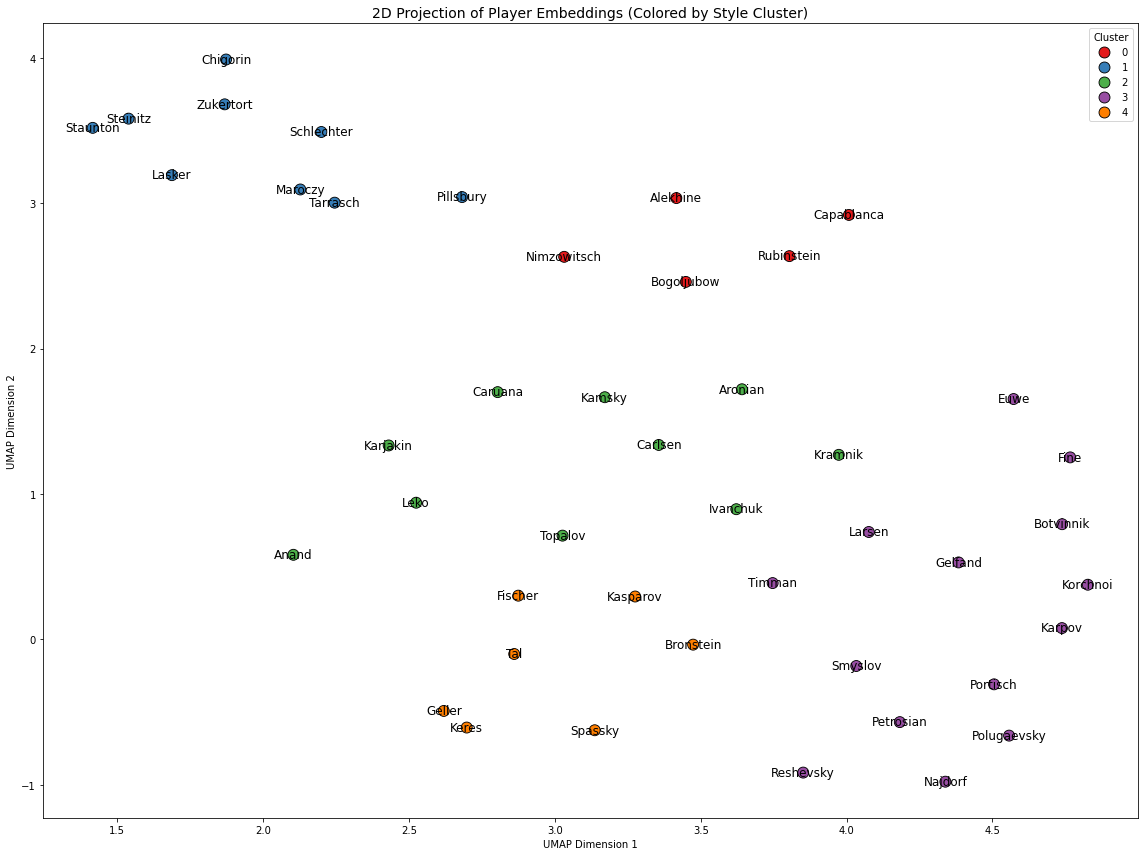

In [11]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Map de clusters por jugador
cluster_map = {
    'Alekhine': 0, 'Bogoljubow': 0, 'Capablanca': 0, 'Nimzowitsch': 0, 'Rubinstein': 0,
    'Chigorin': 1, 'Lasker': 1, 'Maroczy': 1, 'Pillsbury': 1, 'Schlechter': 1, 'Staunton': 1, 'Steinitz': 1, 'Tarrasch': 1, 'Zukertort': 1,
    'Anand': 2, 'Aronian': 2, 'Carlsen': 2, 'Caruana': 2, 'Ivanchuk': 2, 'Kamsky': 2, 'Karjakin': 2, 'Kramnik': 2, 'Leko': 2, 'Topalov': 2,
    'Botvinnik': 3, 'Euwe': 3, 'Fine': 3, 'Gelfand': 3, 'Karpov': 3, 'Korchnoi': 3, 'Larsen': 3, 'Najdorf': 3,
    'Petrosian': 3, 'Polugaevsky': 3, 'Portisch': 3, 'Reshevsky': 3, 'Smyslov': 3, 'Timman': 3,
    'Bronstein': 4, 'Fischer': 4, 'Geller': 4, 'Kasparov': 4, 'Keres': 4, 'Spassky': 4, 'Tal': 4
}

# Añadir cluster al DataFrame
player_embeddings["cluster"] = player_embeddings["player"].map(cluster_map)

# Extraer columnas numéricas
X = player_embeddings.drop(columns=["player", "cluster"])

# UMAP
reducer = umap.UMAP(random_state=3633)
embedding_2d = reducer.fit_transform(X)

# Crear DataFrame con resultados
plot_df = pd.DataFrame({
    "x": embedding_2d[:, 0],
    "y": embedding_2d[:, 1],
    "cluster": player_embeddings["cluster"],
    "player": player_embeddings["player"]
})

# Graficar
plt.figure(figsize=(16, 12))
sns.scatterplot(
    data=plot_df,
    x="x", y="y",
    hue="cluster",
    palette="Set1",
    s=120,
    edgecolor="black"
)

# Nombres centrados en los puntos
for i in range(len(plot_df)):
    plt.text(
        plot_df.loc[i, "x"],
        plot_df.loc[i, "y"],
        plot_df.loc[i, "player"],
        fontsize=12,
        ha='center',  # horizontal alignment
        va='center'   # vertical alignment
    )

plt.title("2D Projection of Player Embeddings (Colored by Style Cluster)", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.savefig("player_clusters_gcn_k5_labeled.png", dpi=300)
plt.show()